# Simulation of the toy model

In [1]:
from pyADAPT.examples.toy import ToyModel
from pyADAPT.dataset import DataSet
from pyADAPT.optimize import Optimizer, optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model = ToyModel()
data = DataSet(
        raw_data_path="../../data/toyModel/toyData.mat",
        data_specs_path="../../data/toyModel/toyData.yaml",
    )

In [3]:
help(optimize)

Help on function optimize in module pyADAPT.optimize:

optimize(model, dataset, *params, n_iter=10, n_tstep=100, n_core=4, **options)
    the main optimization procedure
    
    Parameter
    ---------
    model: a model instance of subclass of BaseModel
    dataset: dataset
    params: list of parameters to be optimized
    n_core: number of processes to spawn
    
    Return
    ------
    (parameter trajectories, state trajectories, time)
    trajectories are xarray.DataArray. just easier to manipulate in the analysis
    routine.



In [4]:
model.parameters.loc[['k1','k2', 'k3']]

,name,value,vary,lb,ub,init
k1,k1,1.0,True,0,inf,1.0
k2,k2,1.0,False,0,inf,1.0
k3,k3,0.1,False,0,inf,0.1


In [28]:
model.reset()
param_traj, state_traj, time = optimize(model, data, 'k1', n_iter=200, n_tstep=50, verbose=Optimizer.ITER, init_method=None)

None


In [29]:
state_traj.shape, param_traj.shape

((200, 50, 4), (200, 50, 1))

In [30]:
state_traj.coords, param_traj.coords

(Coordinates:
   * iter     (iter) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
   * time     (time) float64 0.0 0.2041 0.4082 0.6122 ... 9.388 9.592 9.796 10.0
   * state    (state) <U2 's1' 's2' 's3' 's4',
 Coordinates:
   * iter     (iter) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
   * time     (time) float64 0.0 0.2041 0.4082 0.6122 ... 9.388 9.592 9.796 10.0
   * param    (param) <U2 'k1')

We can see that the data is randomized at the begining, but the parameters are not. They are initialized with the same value from the dataset. This need to be change in the next release.

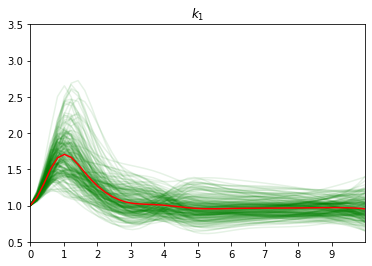

In [34]:
fig, axes = plt.subplots()
for i in param_traj.coords['iter']:
    axes.plot(time, param_traj.loc[i, :, 'k1'], color="green", alpha=0.1)
axes.plot(time, param_traj.sel(param="k1").mean(dim="iter"), color="red")
axes.set_title("$k_1$")
axes.set_ylim([0.5, 3.5])
axes.set_xlim([0, 10])
axes.set_xticks(list(range(10)))
fig.savefig('k1-pyADAPT-altinit.png', dpi=200)

Attention should be paid to the initial spike of the parameter trajectories. This might be a indication of inconsistency of the spline and initial parameters, as mentioned in Pascal van Beek's master thesis. This is not

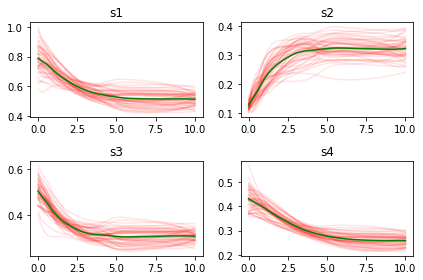

In [14]:
fig, axes= plt.subplots(2, 2)

for a, s in enumerate(state_traj.coords['state']):
    ax = axes.flatten()[a]
    for i in state_traj.coords['iter']:
        ax.plot(time, state_traj.sel(iter=i, state=s), color="red", alpha=0.1)
    ax.set_title(str(s.data))
    ax.plot(time, state_traj.sel(state=s).mean(dim="iter"), color="green")
fig.tight_layout()
fig.savefig('states-pyADAPT-noaltinit')

In [15]:
s.data

array('s4', dtype='<U2')

In [16]:
ndtraj = np.array([p.values for p in param_traj])

In [17]:
import roadrunner

In [18]:
rr = roadrunner.RoadRunner('../../data/trehalose/smallbone.xml')

In [19]:
result = rr.simulate(0, 10, 100)

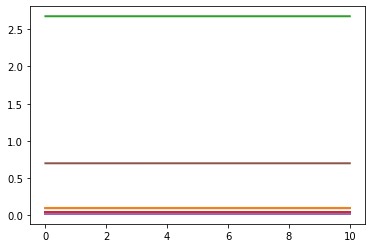

In [22]:
fig, axes = plt.subplots()
rr.plot(axes)
axes.legend()
fig.savefig('rr-trehalose')

In [24]:
rr.model

<roadrunner.ExecutableModel() { this = 000002548946B6B0 }>